# SWMAL Exercise 1 Intro


 

### Setup
#comment
This is the setup we where allowed to keep. Please skip to Qa to find the start of the journal

In [2]:
#comment

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("IGNORING: Saving figure", fig_id) # SWMAL: I've disabled saving of figures
    #if tight_layout:
    #    plt.tight_layout()
    #plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

print("OK")

OK


In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

print("OK")

OK


In [4]:
import os
datapath = os.path.join("../datasets", "lifesat", "")

# NOTE: a ! prefix makes us able to run system commands..
# (command 'dir' for windows, 'ls' for Linux or Macs)
#
! dir
! ls

print("\nOK")

/bin/bash: dir: command not found


Figs                      demo.ipynb                modules_and_classes.ipynb
datasets                  intro.ipynb
datasets.zip              lesson01.pdf

OK


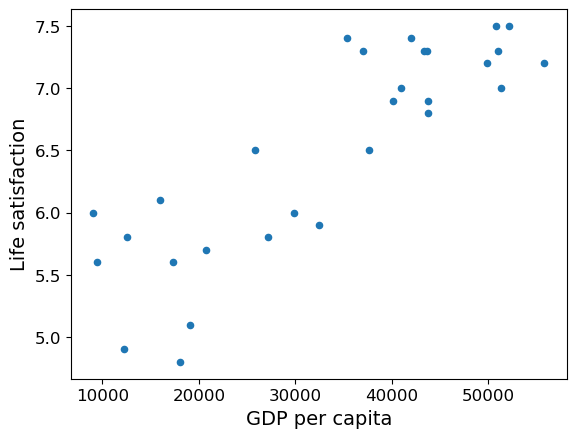

[[5.96242338]]
OK


In [5]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
try:
    oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
    gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
except Exception as e:
    print(f"SWMAL NOTE: well, you need to have the 'datasets' dir in path, please unzip 'datasets.zip' and make sure that its included in the datapath='{datapath}' setting in the cell above..")
    raise e
    
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)



# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]


print("OK")

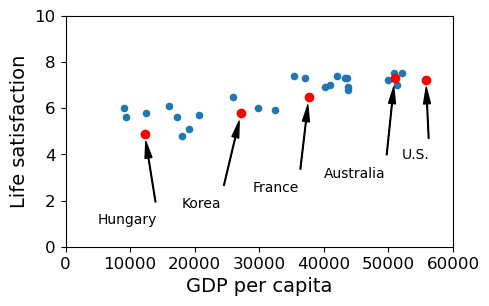

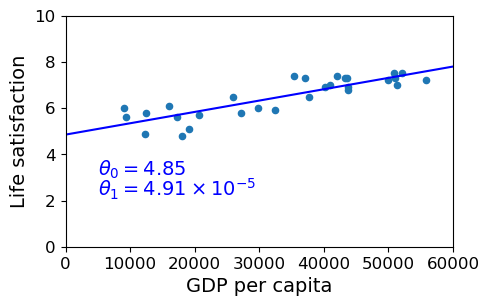

OK


In [6]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#oecd_bli.head(2)

gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
#gdp_per_capita.head(2)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
#missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')
plt.show()

from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)

t0 = 4.8530528
t1 = 4.91154459e-05

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
M=np.linspace(0, 60000, 1000)
plt.plot(M, t0 + t1*M, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('best_fit_model_plot')
plt.show()

print("OK")

## Qa: The $\theta$ parameters and the $R^2$ Score
We will be using the $\theta$ parameters from the model declared above. 
To use the $\theta$ parameters we must extract them from the model. If we want to get the intercept and coefficient params, also called $\theta_0$ and $\theta_1$. For a given model, it is possible to extract $\theta_0$ and $\theta_1$ with following python attributes.


In [7]:
theta0 = model.intercept_  # Intercept
theta1 = model.coef_[0]   

print(f"{theta0}")
print(f"{theta1}")

[4.8530528]
[4.91154459e-05]


In [8]:
r_sq = model.score(X,y)

print(f"{r_sq}")

0.7344414355437031


The $R^2$ score, that is showed, is the coefficient of determination. It determines the fitness of the data to the linear model. It has a max value of 1, which indicates that the data match perfectly to the linear model. 
If you have a coefficient of determination below 0, it indicates that the model that is in use in incorrect.
Therefore the values for $R^2~$ range from minus infinity to 1

It is best to have a high score, as to the fact that the max value 1 tells us that the data fit perfectly to the linear model. 

### Qb) Using k-Nearest Neighbors

In this exercise we will be using the K-nearest neighbors to train the model.

K-nearest is a supervised learning classifier. It uses the amount k nearest data points in the training dataset it has while the linear regression model doesn't use anything when instantiated. 
The default value for K-nearest model is 5 if you don't change it. The method for calling fit and predict both for K-nearest model and linear regression model are the same. 

The score of the model can be compared in the sense that they provide information on how well the model performs. The score will not have a precise and definite saying about which model is best, but if one of the models are almost zero or less compared to another model is are almost 1, we can say that the model closest to 1 is a better model in this thought experiment. If you want to compare them you will also have to look at other different evaluation types like F1-Score. 

In [9]:
# and this is our preprocessed data
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


In the cell below we start with preparing the data and visualizing it. 
We use the K-nearest neighbor regressor from sklearn which can be found: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

X.shape= (29, 1)
y.shape= (29, 1)


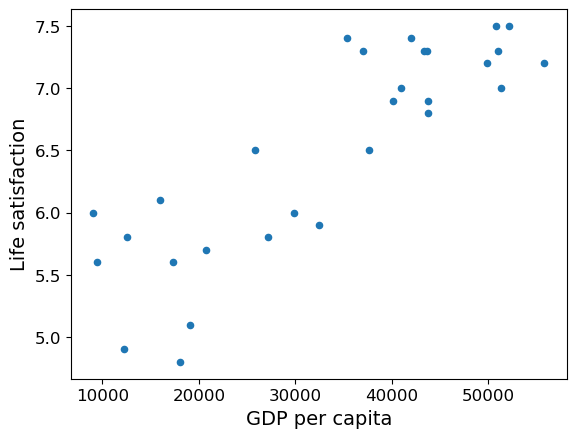

K-nearstneighbor prediction for Cypress: [[5.76666667]]
Linearregression prediction for Cypress: [[5.96242338]]


In [10]:
# Import the KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
#Prepare the data

X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)


# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

plt.show()

# Instantiate 
knn = KNeighborsRegressor(n_neighbors=3)

# Train model
knn.fit(X, y)

# Predict and print the knn = 5.766667
print(f"K-nearstneighbor prediction for Cypress: {knn.predict(X_new)}")# knn = ..
print(f"Linearregression prediction for Cypress: {lin1.predict(X_new)}")

As you can see the prediction for the k-nearest neighbor and linear regression are close to each other. However, they are not the same. This is due to the fact that they are fundamentally different algorithms.

### Qc) Tuning Parameter for k-Nearest Neighbors and A Sanity Check

In this chapter we will look into the tuning of parameter for k-nearest neighbors. By changing the parameter we will look into how it works and do a santity check. We will answer why the score closed to 1 does not mean, that the k-nearest nieghbors is the right esimater for the job. 

The problem with having a k-nearest neighbor produces a score that is 1. It makes a prediction based on the single closest value and that can cause overfitting. Or as you can see on the picture where N=1, the line does follow the rest of the data and is overfitting.

It is also a problem if the k-nearest neighbor gets too large, because the data does not follow the data as you can observe below where K=20.

<img src="https://itundervisning.ase.au.dk/SWMAL/L01/Figs/regression_with_knn.png"  alt="WARNING: could not get image from server." style="height:150px">

1 nearest neighbour score: 1.0
3 nearest neighbour score: 0.8525732853499179
10 nearest neighbour score: 0.7833080605150065


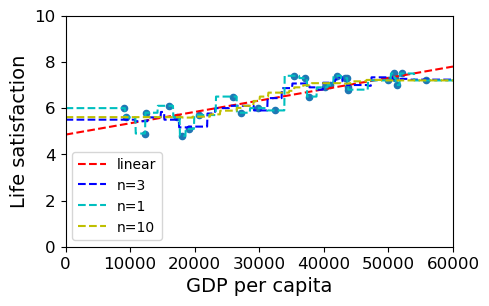

In [11]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

# create an test matrix M, with the same dimensionality as X, and in the range [0;60000] 
# and a step size of your choice
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

# from this test M data, predict the y values via the lin.reg. and k-nearest models
y_pred_lin = model.predict(M)
y_pred_knn = knn.predict(M) 

# use plt.plot to plot x-y into the sample_data plot..
# Plot linear regression
plt.plot(m, y_pred_lin, "r--", label="linear")

# Plot Neighbor set to 3
plt.plot(m, y_pred_knn, "b--", label="n=3")

# Import the KNeighbor regressor
from sklearn.neighbors import KNeighborsRegressor

# Neighbor set to 1
knn1 = KNeighborsRegressor(n_neighbors=1)
knn1.fit(X, y)
y_pred_knn1 = knn1.predict(M)
plt.plot(m, y_pred_knn1, "c--", label="n=1")

# Neighbor set to 10
knn2 = KNeighborsRegressor(n_neighbors=10)
knn2.fit(X, y)
y_pred_knn2 = knn2.predict(M)
plt.plot(m, y_pred_knn2, "y--", label="n=10")

# Legends
plt.legend()

# Print 
print(f"1 nearest neighbour score: {knn1.score(X, y)}")
print(f"3 nearest neighbour score: {knn.score(X, y)}")
print(f"10 nearest neighbour score: {knn2.score(X, y)}")

Above you can both see the score and the plotting of the 3 different amounts of neighbors. The K-nearest neighbor with 1 neighbor has a score 1, and follows the data complete, which is overfitting. The n=3 is better because it follows the flow, but not as much and are less change of overfitting. Looking at n=10 the line is much smoother, but this will also mean that there is a loss of detail. 
It is difficult to tell which model are the best one from the diagram. The goal is to have a balance between having a small enough k to capture local patterns and but also large enough to reduce noise.

### Qd) Trying out a Neural Network

We are going to try to use the neural network. We are using the Multi-Layer Perceptron (MLP) for regression. We find the MLPregressor here: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

OBS. Each run of the column below produces a different outcome, because we make a new MPLRegressor and training again.  

In [24]:
from sklearn.neural_network import MLPRegressor;

# Setup MLPRegressor
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True);

mlp.fit(X, y.ravel())

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M)

Iteration 1, loss = 103973.70805067
Iteration 2, loss = 94453.76574481
Iteration 3, loss = 85404.46329600
Iteration 4, loss = 76833.18742100
Iteration 5, loss = 68745.92120590
Iteration 6, loss = 61147.09257150
Iteration 7, loss = 54039.42244438
Iteration 8, loss = 47423.77504388
Iteration 9, loss = 41299.01321714
Iteration 10, loss = 35661.86233206
Iteration 11, loss = 30506.78685617
Iteration 12, loss = 25825.88438528
Iteration 13, loss = 21608.80250166
Iteration 14, loss = 17842.68438490
Iteration 15, loss = 14512.14950113
Iteration 16, loss = 11599.31587194
Iteration 17, loss = 9083.87027414
Iteration 18, loss = 6943.19213986
Iteration 19, loss = 5152.53581267
Iteration 20, loss = 3685.27408974
Iteration 21, loss = 2513.20360678
Iteration 22, loss = 1606.90963009
Iteration 23, loss = 936.18432471
Iteration 24, loss = 470.48878361
Iteration 25, loss = 179.44534259
Iteration 26, loss = 33.34335407
Iteration 27, loss = 3.63906801
Iteration 28, loss = 63.42895392
Iteration 29, loss = 1

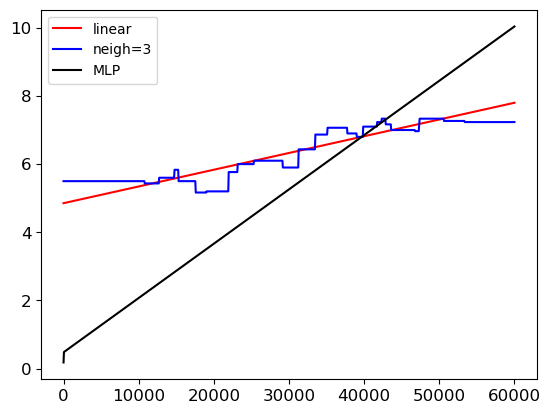

In [23]:
plt.plot(m, y_pred_lin, "r", label="linear")
plt.plot(m, y_pred_knn, "b", label="neigh=3")
plt.plot(m, y_pred_mlp, "k", label="MLP")
plt.legend();

In [14]:
print(f"MLP score:  {mlp.score(X, y)}")
print(f"K-nearstneighbor=3 score: {knn.score(X, y)}")
print(f"Linearregression score: {lin1.score(X, y)}")

MLP score:  -3.6741440524092503
K-nearstneighbor=3 score: 0.8525732853499179
Linearregression score: 0.7344414355437031


The score for the MLP differs each time you train the model, sometimes the score is -25.42, -3.85 or other values. As we can observe both from the score and the plot the Multi-Layer Perception from the Neural Network does not fit the data well for iterations up till 10000. The score can again be used as a indicator of the fitness of the model. 
As we can see the data-set for the training does not scale well with the MLP without prescaling. The next chapter we will use the prescaling. 

# SWMAL Exercise

## Python Basics

### Modules and Packages in Python

#### Qa Load and test the `libitmal` module
This chapter will decribe how to load and test modules. Firstly you have to import sys and os for being allowed to work with the  system and the operation system. Here you will load the gitmal package. The import can be done a few different ways and in the example below the expanduser will be used. You can see below that we print of the path and the files.

In [1]:
import sys,os
sys.path.append(os.path.expanduser('../'))

from libitmal import utils as itmalutils
print(dir(itmalutils))
print(itmalutils.__file__)
itmalutils.TestAll()


['AssertInRange', 'CheckFloat', 'DToXy', 'GenerateConfusionMatrix', 'GenerateResults', 'InRange', 'Iterable', 'ListToMatrix', 'ListToVector', 'PrintMatrix', 'ResetRandom', 'ShowResult', 'TEST', 'TestAll', 'TestCheckFloat', 'TestPrintMatrix', 'TestVarName', 'VarName', 'XyToD', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'ctxlib', 'inf', 'inspect', 'isFloat', 'isList', 'isNumpyArray', 'nan', 'np', 'random', 're', 'sklearn']
c:\Users\Bjark\source\repos\MAL\mal12\L01\..\libitmal\utils.py
TestPrintMatrix...(no regression testing)
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
X=[[ 1.  2.]
   ...
   [ 1. -1.]]
X=[[   1.
       2.    ]
   [   3.0001
    -100.    ]
   [   1.
      -1.    ]]
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
OK
TEST: OK
ALL OK


#### Qb Create your own module, with some functions, and test it

Here we create our own module. The module is places inside the mal12, which is our github folder. This will make it easy to collaborate and will be pushed every time changed are made. Creating our module is done by creating two files. The "__init__.py" and "utils.py" 

In [5]:
import sys,os
import numpy as np
sys.path.append(os.path.expanduser('~/MAL/mal12'))

from UtilsMAL import utils as myUtils
print(dir(myUtils))
print(myUtils.__file__)

L1= myUtils.L1

dummy = np.array([3,4,5])
print(f"The answer for the L1: {L1(dummy)}")

['L1', 'L2', 'L2Dot', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'checkArraySize', 'checkArraySizeCoantainsElements', 'if_windoes', 'np', 'os']
c:\Users\Bjark\source\repos\MAL\mal12\L01\..\UtilsMAL\utils.py
The answer for the L1: 12.0


#### Qc How do you 'recompile' a module?

If you are using the Visual Studie Code the reloading works out-of-the-box. However, this is not the same for Jupyter Notebook. In Jupyter you have to either use the importlib or use a smart syntax for autoreload. The information is found at: [Jupyter Notebook Reload Module: A Comprehensive Guide](https://saturncloud.io/blog/jupyter-notebook-reload-module-a-comprehensive-guide/). Below you can see the different ways to reload. For autoreaload, when the parameter is set to 2 it load on every reload.

In [3]:
import importlib
importlib.reload(myUtils)

# Auto reload
%load_ext autoreload
%autoreload 2

#### [OPTIONAL] Qd Write a Howto on Python Modules a Packages

Write a short description of how to use modules in Python (notes on modules path, import directives, directory structure, etc.)

In this chapter we will look into creating our own library. Firstly create a new folder and name is UtilsMal. Inside this  Now will create two files. Them first file called "__init__.py" and the second utils


### Classes in Python

#### Qe Extend the class with some public and private functions and member variables

For creating a class in python you will often see the keyword self. It is the representation of the instance of the class. The "self" keyword is be renamed, but the convention is self. If you forget the "self" keyword the class will be static. A static class are not allowed to call the members of the class or make a instance of the class. In the codesnippets below you can observe the `def myfun():` where self is forgotten. IF you run the code you will get the error: `TypeError: MyClass.myfun() takes 0 positional arguments but 1 was given`. The error is because a instance `myobjectx`  of MyClass is made and it attempt to call the `myobjectx.myfun()` Python will raise a the error, because it is excepting one argument "self". 

In [15]:
class MyClass:
    def myfun(self):
        myvar = "blah" # NOTE: a per class-instance variable.
        print(f"This is a message inside the class, myvar={myvar}.")

myobjectx = MyClass()
print(myobjectx.myfun())


This is a message inside the class, myvar=blah.
None


Member are public when there is non underscore before the variable. If there are one underscore the member are protected. Private if two underscores. The function are private if you use a single underscore as a prefix to their name. 

#### Qf Extend the class with a Constructor

The constructor in Python is defined using the `__init__` method. The the constructor  take the parameter `self` and can be add more to parameter if needed. If you dont want a class the need a contructor, you can create a static class. The destructor in Python is ofte referred as `__del__` or `__del1__`. The destructor is used to define behavior that occurs when an object is about to be destroyed or garbage collected.   

In [16]:
class NewClass:
    def fun():
        return ("Static instance"); # private instance attribute

print(NewClass.fun());

Static instance


In [17]:
class MyClass:
    def __init__(self, text):
        self.__myvar=text  # private instance attribute

    def myfun(self, text):
        vs = text
        print(f"This is a message inside the class, myvar={vs}.")

myobjectx = MyClass("text")

print(myobjectx.myfun("nontext"))

This is a message inside the class, myvar=nontext.
None


#### Qg Extend the class with a to-string function

This chapter will show how to make a `tostring()` function in Python. Call the function `__str__`, because the standard way to do it in Python. We call the funcion inside the print function. 


In [18]:
class MyClass:
    def __init__(self, text):
        self.__myvar=text 
    
    def __str__(self):
        return f"MyClass instance with value: {self.__myvar}"

myobjectx = MyClass("text")
print(myobjectx.__str__())

MyClass instance with value: text


# SWMAL Exercise

## Mathematical Foundation

### Vector and matrix representation in python


$$
    \newcommand\rem[1]{}
    \rem{SWMAL: CEF def and LaTeX commands, remember: no newlines in defs}
    \newcommand\eq[2]{#1 &=& #2\\}
    \newcommand\ar[2]{\begin{array}{#1}#2\end{array}}
    \newcommand\ac[2]{\left[\ar{#1}{#2}\right]}
    \newcommand\st[1]{_{\scriptsize #1}}
    \newcommand\norm[1]{{\cal L}_{#1}}
    \newcommand\obs[2]{#1_{\text{\scriptsize obs}}^{\left(#2\right)}}
    \newcommand\diff[1]{\text{d}#1}
    \newcommand\pown[1]{^{(#1)}}
    \def\pownn{\pown{n}}
    \def\powni{\pown{i}}
    \def\powtest{\pown{\text{\scriptsize test}}}
    \def\powtrain{\pown{\text{\scriptsize train}}}
    \def\bX{\mathbf{M}}
    \def\bX{\mathbf{X}}
    \def\bZ{\mathbf{Z}}
    \def\bw{\mathbf{m}}
    \def\bx{\mathbf{x}}
    \def\by{\mathbf{y}}
    \def\bz{\mathbf{z}}
    \def\bw{\mathbf{w}}
    \def\btheta{{\boldsymbol\theta}}
    \def\bSigma{{\boldsymbol\Sigma}}
    \def\half{\frac{1}{2}}
$$

This exercise is about vector and matrix representation in Python. Firstly, there will be showed how to implement an array in python. Secondly, the $\norm{1}$ and $\norm{2}$ will be implemented without using `sqrt` or other mathmatical operators from math the library. 

#### Qa Given the following $\mathbf{x}^{(i)}$'s, construct and print the $\mathbf X$ matrix in python.

$$
    \ar{rl}{
      \bx\pown{1} &= \ac{c}{ 1, 2, 3}^T \\
      \bx\pown{2} &= \ac{c}{ 4, 2, 1}^T \\
      \bx\pown{3} &= \ac{c}{ 3, 8, 5}^T \\
      \bx\pown{4} &= \ac{c}{-9,-1, 0}^T
    }
$$


For using the Python in the course we will have to get familiar with Python and the libraries.

In this chapter we will show how you can implement an array using numpy. You can either create the whole array at once or you can use the append function. The append take two arrays and put them together in a new array. Another function is the vstack, where the function vertically stack each element. 

In [2]:
import numpy as np
y = np.array([1, 2, 3, 4]) # NOTE:  you'll need this later

# Default method
X = np.array([[1, 2, 3],[4, 2, 1], [3, 8, 5], [-9, -1, 0]])

# print the full matrix
print(f"X = \n{X}")

# use the vstack
np.vstack(([1, 2, 3],[4, 2, 1], [3, 8, 5], [-9, -1, 0]))



# Use append 
q= np.array([[1, 2, 3],[4, 2, 1]] ) # NOTE:  you'll need this later
q = np.append(q, [[3, 8, 5], [-9, -1, 0]],axis = 0)

# print the full matrix
print(f"q = \n{q}")

X = 
[[ 1  2  3]
 [ 4  2  1]
 [ 3  8  5]
 [-9 -1  0]]
q = 
[[ 1  2  3]
 [ 4  2  1]
 [ 3  8  5]
 [-9 -1  0]]


### Norms, metrics or distances

#### Qb Implement the $\norm{1}$ and $\norm{2}$ norms for vectors in python.

Here we will ilustrate how to use the norms, metrices or distances. The first thing you will notice below is two functions for error validation, that belongs to an exercise that will be decribed later on. The test of the validation is done up here, we will explain alot more later on. Just below the validation function, you can observe the L1, L2 and L2Dot. The L1 is given the distance between two vectors. Therefore, it takes the absolute value and sum all numbers together.


$$
    \ar{ll}{      
          \text{d}(\bx,\by) &= ||\bx-\by||_2\\
                     &= \left( \sum_{i=1}^n \left| x_{i}-y_{i} \right|^2 \right)^{1/2}
    }
$$ 

 The L2 is the Eucalidian distance or norm for a vector. You can define it through a sum operation or a dot operation. Dot operation is vector multiplied with itself

$$
    \norm{2}:~~ ||\bx||_2 = \left( \sum_{i=1}^{n} |x_i|^2 \right)^{1/2}\\
$$ 



In [2]:
import math

def checkArraySize(X):
    assert X.shape[0]>=0
    if not X.ndim==1:
        raise Exception("Array size needs to bigger than 1 dimision")

def L1(X):
    checkArraySize(X)
    return sum((Xi**2)**0.5 for Xi in X) 


def L2(X):
    checkArraySize(X)
    return sum((Xi*Xi) for Xi in X) **(1/2)

def L2Dot(X):
    return np.sqrt(np.dot(X,X))


# Test the function with the following vectors
tx=np.array([1, 2, 3, -1])
ty=np.array([3,-1, 4,  1])

expected_d1=8.0
expected_d2=4.242640687119285

d1=L1(tx-ty)
d2=L2(tx-ty)

print(f"tx-ty={tx-ty}, d1-expected_d1={d1-expected_d1}, d2-expected_d2={d2-expected_d2}")

eps=1E-9 
# NOTE: remember to import 'math' for fabs for the next two lines..
assert math.fabs(d1-expected_d1)<eps, "L1 dist seems to be wrong" 
assert math.fabs(d2-expected_d2)<eps, "L2 dist seems to be wrong" 

print("OK(part-1)")

# comment-in once your L2Dot fun is ready...
d2dot=L2Dot(tx-ty)
print("d2dot-expected_d2=",d2dot-expected_d2)
assert math.fabs(d2dot-expected_d2)<eps, "L2Ddot dist seem to be wrong" 
print("OK(part-2)")

tx-ty=[-2  3 -1 -2], d1-expected_d1=0.0, d2-expected_d2=0.0
OK(part-1)
d2dot-expected_d2= 0.0
OK(part-2)


## The cost function, $J$
### Qc Construct the Root Mean Square Error (RMSE) function (Equation 2-1 [HOML]).

We will here show how to call the function Root Mean Square Error (RMSE), by using the $\bX$ matrix and $\by$ from Qa. 
There will be implemented a dummy hypothesis function. With this function we will be taking the first column of $\bX$ as its 'prediction'

$$
    h\st{dummy}(\bX) = \bX(:,0)
$$

We will be calling the '''L2''' function that has been implemented internally in RMSE


In [3]:
def RMSE(X,y):
    dif_array = X - y
    checkArraySize(dif_array)  
    return (L2(dif_array))*0.5
        
# Dummy h function:
def h(X):    
    if X.ndim!=2:
        raise ValueError("excpeted X to be of ndim=2, got ndim=",X.ndim)
    if X.shape[0]==0 or X.shape[1]==0:
        raise ValueError("X got zero data along the 0/1 axis, cannot continue")
    return X[:,0]

# Calls your RMSE() function:
r=RMSE(h(X),y)

# TEST vector:
eps=1E-9
expected=6.57647321898295
print(f"RMSE={r}, diff={r-expected}")
assert math.fabs(r-expected)<eps, "your RMSE dist seems to be wrong" 

print("OK")

RMSE=6.576473218982953, diff=2.6645352591003757e-15
OK


### MAE

#### Qd Similar construct the Mean Absolute Error (MAE) function (Equation 2-2 [HOML]) and evaluate it.

As we just created a function for the RMSE, we also want to create a function for the Mean Absolute Error (MAE). The MAE will internally use the $\norm{1}$

$$
    \ar{rl}{
        \text{MSE} &= \frac{1}{n} \sum_{i=1}^{n} (\hat{Z}_i-Z_i)^2 = \frac{1}{n} SS\\
        \text{RMSE} &= \sqrt{\text{MSE}}\
    }
$$
  

In [4]:
def MAE(X,y):
    checkArraySize(X)
    L1(X-y)
    return L1(X-y)/X.size

# Calls your MAE function:
r=MAE(h(X), y)

# TEST vector:
expected=3.75
print(f"MAE={r}, diff={r-expected}")
assert math.fabs(r-expected)<eps, "MAE dist seems to be wrong" 

print("OK")

MAE=3.75, diff=0.0
OK


## Pythonic Code

#### Qe Robust Code 

We have added error checking code (asserts or exceptions), that checks for right $\hat\by$-$\by$ sizes of the MSE and MAE functions.

We have also error checking to all the previously tested L2() and L1() functions. as can be seen in the following code block 

In [2]:
def checkArraySize(X):
    assert X.shape[0]>=0
    if not X.ndim==1:
        raise Exception("Array size needs to bigger than 1 dimision")

def L1(X):
    checkArraySize(X)
    return sum((Xi**2)**0.5 for Xi in X) 


def L2(X):
    checkArraySize(X)
    return sum((Xi*Xi) for Xi in X) **(1/2)

def RMSE(X,y):
    dif_array = X - y
    checkArraySize(dif_array)  
    return (L2(dif_array))*0.5

def MAE(X,y):
    checkArraySize(X)
    L1(X-y)
    return L1(X-y)/X.size

### Qf Conclusion


In this exercise we have implemented the L1 and L2 distance functions. We have also manually implemented the RMSE and MAE functions without the use of built-in function. We have tested the functions with the given vectors and the results are as expected. This is to learn and become familiar with the formulars and functions. And get a better understanding the math behind the methods often used in Machine Learning. Lastly, we also have learned how to check if the functionality is correct in the functions by adding error checking in our python code.

# SWMAL Exercise

## Implementing a dummy binary-classifier with fit-predict interface

In this exercise we will working with the MNIST data-set and reuse the data loader from Scikit-learn. Next we create a dummy classifier, and compare the results of the SGD and dummy classifiers using the MNIST data.

#### Qa  Load and display the MNIST data

We will fetch the MNIST data with a `sklearn.datasets.fetch_openml` dataloader interface in Scikit-learn. 

Two functions are created. One to fetch the data-set and one to plot a single digit. 

c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Number of samples: 70000
Label of the digit: 4


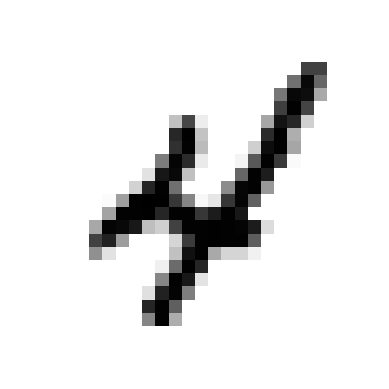

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt

# Function to fetch the MNIST dataset
def MNIST_GetDataSet():
    X,y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame = False)
    return X,y


# Function to plot a digit
%matplotlib inline
def MNIST_PlotDigit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

# Fetches X and y
X,y = MNIST_GetDataSet()

#Convert to [0;1] via scaling
X = X / 255.

#Check if data is loaded
print("Number of samples:", len(X))


digit_to_plot = X[9]  # The index is 9 for the 10th digit (0-based index)

#Check what number the image is representing
print("Label of the digit:", y[9])

MNIST_PlotDigit(digit_to_plot)


As we can see, a random digit is chosen (9). The image is shown and the y_true is 4.

#### Qb  Add a Stochastic Gradient Decent [SGD] Classifier
In this section we create a train-test data-set for MNIST and use the `SGDClassifier` as done in [HOML].

We split the data and run the fit-predict for the classifier using the MNIST data.
We will try to predict and identify one-digit. In this example we will try to detect if the image shows the number 5. This “5-detector” will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and non-5.
We will also see if there are any missclassified. 


X.shape=(70000, 784)


Predicted Label: False


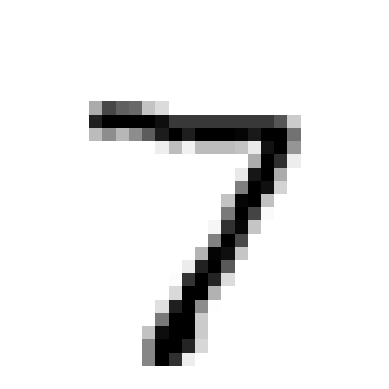

Predicted Label: False


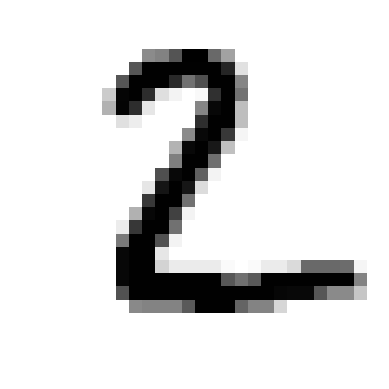

Predicted Label: False


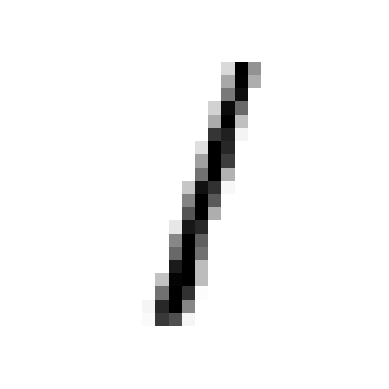

In [2]:
# TODO: add your code here..
import numpy as np
from sklearn.linear_model import SGDClassifier

#reshapes X to 2D array if not already
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print(f"X.shape={X.shape}") # X.shape= (70000, 784)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Create binary target variable y_train_5 with the digit '5' as true
y_train_5 = (y_train == '5')   # True for all 5s, False for all other digits
# Create binary target variable for the testing set
y_test_5  = (y_test == '5')

# Create a SGDClassifier which will classify if a digit is a 5 or not
sgd_clf = SGDClassifier(random_state=42)

# Train the classifier using the training data
sgd_clf.fit(X_train, y_train_5)

y_pred = sgd_clf.predict(X_test)

classified_numbers = np.where(y_pred == y_test_5)[0]

for number in classified_numbers[:3]:
    MNIST_PlotDigit(X_test[number])
    # Predict if the digit is a 5 or not
    prediction = sgd_clf.predict([X_test[number]])  # Provide the data sample
    print(f"Predicted Label: {prediction[0]}")
    plt.show()


Given a loop that iterates through the first 3 instances where y_pred = y_test_5 (correctly classified numbers), we see that the predicted labels are consistent with images

Predicted Label: False


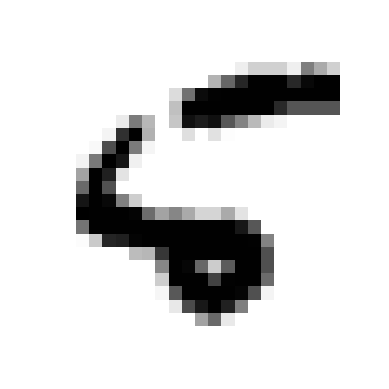

Predicted Label: False


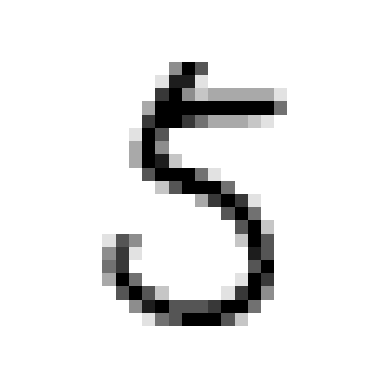

Predicted Label: False


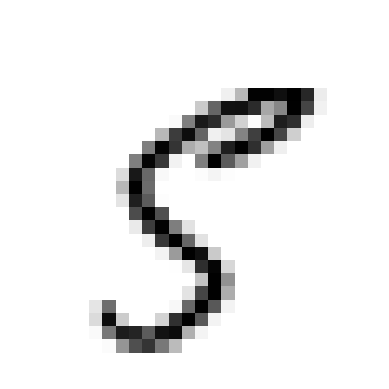

In [3]:
# Find misclassified instances
misclassified_numbers = np.where(y_pred != y_test_5)[0]
classified_numbers = np.where(y_pred == y_test_5)[0]

for number in misclassified_numbers[:3]:
    MNIST_PlotDigit(X_test[number])
    prediction = sgd_clf.predict([X_test[number]])  # Provide the data sample
    print(f"Predicted Label: {prediction[0]}")

    plt.show()


In the same way, we identified some digits that were missclassified. It seems that it is not always precise. 

#### Qc Implement a dummy binary classifier

In this section we try to create a dummy classifier that just classifies every single image in class of the majority, which in this case is the non-5 class.
We call the fit-predict on our dummy class and extract the accuract score from the test data.

In [4]:

from sklearn.metrics import accuracy_score
import numpy as np

class DummyClassifier():
    def fit(self, X, y):
        # does not require any training, only memorizes the unique classes in y.
        self.classes_ = np.unique(y)
        self.dummy_class_ = np.argmax(np.bincount(y))  # Select the most frequent class as the dummy class
        return self

    def predict(self, X):
        # Returns array of the same length as X with the dummy class label
        return np.full(X.shape[0], fill_value=self.dummy_class_)


dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5) #trains the dummy classifier. Does not do anything
y_pred = dummy_clf.predict(X_test)
print(any(y_pred)) #predicts if any of the digits is a 5, gives a False

accuracy_score(y_test_5, y_pred)
#91% accuracy, just like in HOML


False


0.9108

With the dummy class every digit is a non-5. 
When we extract the accuracy score we get the same score as in HOML. 

### Qd Conclusion

As seen in the exercise we can use the SGDClassifier to train our data-set from MNIST. Through the exercise we can conclude that the train and test fits and has some correct predictions and some incorrect predictions. 
When testing the performance measures for the classifier it is a bit tricky to evaluate. We see that we get a 91% accuracy score for our DummyClassifier, which only spits a false out for every digit. But because the majority for the digits are non-5 (90% of them), this will then be our score. In this case, the accuracy score does not represent how good/fit our model is at all. We can therefore conclude, that it is not always preferred so use accuracy to define the performance measures when dealing with classifiers. Especially not, in data-sets where some classes are much more frequent than others. 




# SWMAL Exercise Performance metrics
In this exercise we will take a look at various ways to evaluate your algorithm using performance metrics. We will do this be recreating some of the well known metric formulas in python functions, and comparing them to the version found in the Sklearn.metrics library. These functions will then be tested on the algorithms from the dummy classifier exercise.

<img src="https://itundervisning.ase.au.dk/SWMAL/L02/Figs/performance_metrics.jpg" alt="WARNING: could not get image from server" style="width:900px">

The following codebit is copied from the dummy classifier exercise, and will therefore not be described further.


In [15]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import numpy as np



# Function to fetch the MNIST dataset
def MNIST_GetDataSet():
    X,y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame = False)
    return X,y
# Fetches X and y
X,y = MNIST_GetDataSet()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Create binary target variable y_train_5 with the digit '5' as true
y_train_5 = (y_train == '5')   # True for all 5s, False for all other digits
# Create binary target variable for the testing set
y_test_5  = (y_test == '5')

# Create a SGDClassifier which will classify if a digit is a 5 or not
sgd_clf = SGDClassifier(random_state=42)

# Train the classifier using the training data
sgd_clf.fit(X_train, y_train_5)
#Convert to [0;1] via scaling
X = X / 255.
y_pred_sdg = sgd_clf.predict(X_test)


#Check if data is loaded

class DummyClassifier():
    def fit(self, X, y):
        # does not require any training, only memorizes the unique classes in y.
        self.classes_ = np.unique(y)
        self.dummy_class_ = np.argmax(np.bincount(y))  # Select the most frequent class as the dummy class
        return self

    def predict(self, X):
        # Returns array of the same length as X with the dummy class label
        return np.full(X.shape[0], fill_value=self.dummy_class_)


dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
y_pred_dummy = dummy_clf.predict(X_test)



c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


#### Qa Implement the Accuracy function and test it on the MNIST data.

an accuracy function will be created called MyAccuracy. It will return how many elements where predicted correctly. Furthermore a test function will be created. This function will use both the selfmade function and the sklearn version for validation. The testfunction will then be used on a simple example, the sdg and the dummy.

In [9]:
# TODO: Qa...
from sklearn.metrics import accuracy_score


def MyAccuracy(y_true, y_pred):
    if len(y_true)==0 or len(y_pred)==0:
        return 0
    y_correctPred=[]
    for i in range(len(y_true)):
        if y_true[i]==y_pred[i]:
            y_correctPred.append(y_pred[i])
    return len(y_correctPred)/len(y_true)


    
# TEST FUNCTION: example of a comperator, using Scikit-learn accuracy_score
def TestAccuracy(y_true, y_pred):
    if len(y_true) != len(y_pred):
      print("Error: Input arrays have different lengths.")
      return
    a0=MyAccuracy(y_true, y_pred)
    a1=accuracy_score(y_true, y_pred)

    print(f"\nmy a          ={a0}")
    print(f"scikit-learn a={a1}")

print("\nTestAccuracy() simple example:")
TestAccuracy([1,2,3,4], [1,2,3,3])

print("\nTestAccuracy() on sdg:")
TestAccuracy(y_test_5, y_pred_sdg)
print("\nTestAccuracy() on dummy:")
TestAccuracy(y_test_5, y_pred_dummy)

#    # do some numerical comparison here, like
#    #  if fabs(a0-a1)<eps then ..


TestAccuracy() simple example:

my a          =0.75
scikit-learn a=0.75

TestAccuracy() on sdg:

my a          =0.9492
scikit-learn a=0.9492

TestAccuracy() on dummy:

my a          =0.9108
scikit-learn a=0.9108


#### Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data for both the SGD and Dummy classifier models

In the following section a function and test function is created in the same way as with the previous function from Qa. This is done for the precision-, recall- and F1-score respectively.  

In [10]:
# TODO: Qb..
import sklearn.metrics as metrics
def MyPrecision(y_true, y_pred):
    #predicted condition positive. All the predicted trues
    pcp = [item for item in y_pred if item == True]
    if len(pcp)==0:
        return 0
    y_correctPred=[]
    for i in range(len(y_true)):
        if y_true[i]==True and y_pred[i]==True:
            y_correctPred.append(y_pred[i])
    return len(y_correctPred)/len(pcp)

def TestPrecision(y_true, y_pred):
    if len(y_true) != len(y_pred):
      print("Error: Input arrays have different lengths.")
      return
    p0=MyPrecision(y_true, y_pred)
    p1=metrics.precision_score(y_true, y_pred)

    print(f"\nmy p        ={p0}")
    print(f"scikit-learn p={p1}")

print("\nTestPrecision() simple example:")
TestPrecision([True,True,False,True], [True,True,True,False])
print("\nTestPrecision() on sdg:")
TestPrecision(y_test_5, y_pred_sdg)
print("\nTestPrecision() on dummy:")
TestPrecision(y_test_5, y_pred_dummy)




    



TestPrecision() simple example:

my p        =0.6666666666666666
scikit-learn p=0.6666666666666666

TestPrecision() on sdg:

my p        =0.6618887015177066
scikit-learn p=0.6618887015177066

TestPrecision() on dummy:

my p        =0
scikit-learn p=0.0


c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


the precision metric can be used to identify the ratio between true positives and false positives. We see in the simple example that the methods filter out the predicted false, and just evaluates the 3 trues. This results in a score of 66% since one is a false positive. By using it on the data from the dummy exercise we furthermore see that the dummy get 0% because it only guesses false and the SDG get about 2/3. This means that about 1/3 of the numbers the algorithm thinks is a five actually arent a 5. In the real world this would be horrible if it fx was used to convict crimminals where you are innocent until proven guilty.

In [11]:
def MyRecall(y_true, y_pred):
    #condition positive
    cp = [item for item in y_true if item == True]
    if len(cp)==0:
        return 0
    y_correctPred=[]
    for i in range(len(y_true)):
        if y_true[i]==True and y_pred[i]==True:
            y_correctPred.append(y_pred[i])
    return len(y_correctPred)/len(cp)

def TestRecall(y_true, y_pred):
    if len(y_true) != len(y_pred):
      print("Error: Input arrays have different lengths.")
      return
    r0=MyRecall(y_true, y_pred)
    r1=metrics.recall_score(y_true, y_pred)

    print(f"\nmy r        ={r0}")
    print(f"scikit-learn r={r1}")

print("\nTestRecall() simple example:")
TestRecall([True,True,True,True], [True,True,True,False])
print("\nTestRecall() on sdg:")
TestRecall(y_test_5, y_pred_sdg)
print("\nTestRecall() on dummy:")
TestRecall(y_test_5, y_pred_dummy)


TestRecall() simple example:

my r        =0.75
scikit-learn r=0.75

TestRecall() on sdg:

my r        =0.8800448430493274
scikit-learn r=0.8800448430493274

TestRecall() on dummy:

my r        =0.0
scikit-learn r=0.0


The recall metric tells us about the ratio between true positives and false negatives. Through this metric we can observe how many positives fall through and therefore aren't noticed by the algorithm. 
The results show us that the sdg-is quite good at finding the 5's very few 5's slip through the algorithm even though it also identifies some numbers as 5's that arent 5's.
In the real world it would be important in fx sickness detection where it is important to find and treat all the cases and it is probably fine if a a few false positives are sent through further investigation.

In [12]:
def MyF1Score(y_true, y_pred):
    p = MyPrecision(y_true, y_pred)

    r = MyRecall(y_true, y_pred)
    if p==0 or r==0:
        return 0
    return 2/((1/p)+(1/r))

def TestF1Score(y_true, y_pred):
    if len(y_true) != len(y_pred):
      print("Error: Input arrays have different lengths.")
      return
    f0=MyF1Score(y_true, y_pred)
    f1=metrics.f1_score(y_true, y_pred)

    print(f"\nmy f        ={f0}")
    print(f"scikit-learn f={f1}")

print("\nTestF1Score() simple example:")
TestF1Score([True,True,False,True], [True,False,True,False])
print("\nTestF1Score() on sdg:")
TestF1Score(y_test_5, y_pred_sdg)
print("\nTestF1Score() on dummy:")
TestF1Score(y_test_5, y_pred_dummy)


TestF1Score() simple example:

my f        =0.4
scikit-learn f=0.4

TestF1Score() on sdg:

my f        =0.7555341674687199
scikit-learn f=0.75553416746872

TestF1Score() on dummy:

my f        =0
scikit-learn f=0.0


The F1 score takes both the recall, and the precision into account which means the sdg-score lands somewhere between the two scores. Through this metric we identify how often false positives and false negatives occur without looking at the true negatives.

#### Qc The Confusion Matrix
In this section we will construct 3 confusion matrices. One for the both the sdg and the dummy, aswell as one where the input params are switched for the sdg confusion matrices.

In [13]:
# TODO: Qc
from sklearn.metrics import confusion_matrix
cm_sdg = confusion_matrix(y_test_5, y_pred_sdg)
cm_sdg_reversed = confusion_matrix(y_pred_sdg, y_test_5)


cm_dummy = confusion_matrix(y_test_5, y_pred_dummy)
print("sdg:")
print(cm_sdg)

print("\ndummy:")
print(cm_dummy)

print("\nsdg reversed:")
print(cm_sdg_reversed)

sdg:
[[8707  401]
 [ 107  785]]

dummy:
[[9108    0]
 [ 892    0]]

sdg reversed:
[[8707  107]
 [ 401  785]]


In the above results we can see the matrices follow the binary system where 0=false and 1=true. From the dummy matrix we can gather the columns are the predicted values since there are none in column 1 (0-indexed) and there fore the rows must be the true condition. This means the first spot is the true negatives and that adds up with what is known about the dummys result so far. 
Furthermore we see that if we swap the input parameters the false positives and true negatives swap places. But the accuracy stays the same. 

#### Qd A Confusion Matrix Heat-map

Now we will generate a heat map for this confusion matrices.

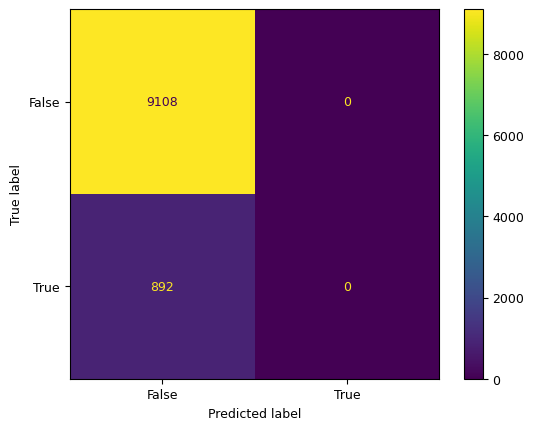

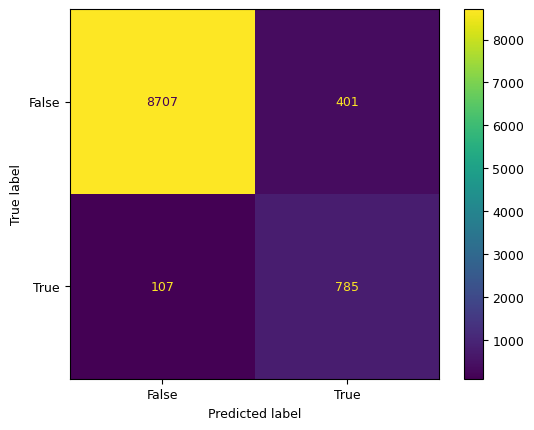

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_test_5,y_pred_dummy) 
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test_5,y_pred_sdg)
plt.show()

### Qe Conclusion

In this exercise, we evaluated classification algorithms using custom Python metrics and scikit-learn's functions. We assessed precision, accuracy, recall, and the F1-score for an SGD classifier and a Dummy classifier. The SGD classifier outperformed the Dummy classifier in all metrics. However the dummy clasifier was significantly closer in accuracy. Therefore this exercise was meant to show us some important metrics to use when evaluating your algorithm. These metrics are of course use case specific. Fx it could be a good idea to have a high precision when judging criminals or have a high recall/sensitivity when scanning for diseases. Furthermore the F1-score is usefull if you don't care as much about the true negatives as it takes both into account. As is the case for the "is it a 5?"-algorithm and therefore the F1 provides us with a more accurate assesment of how useful the sdg algorithm and dummy-classifier are with thier ~75% and 0% respectively 

 Furthermore Confusion matrices and heatmaps provided detailed insights into their performance, and granted us a good visual component for the metrics. These will be important further in the course when we analyze more complex systems with more parameters. 